In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from DecisionTreeRegressor import *

In [3]:
#Define a simple range of values for x and reshape so sklearn likes it.
x = np.linspace(0,1,200)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise
x = x - 0.5

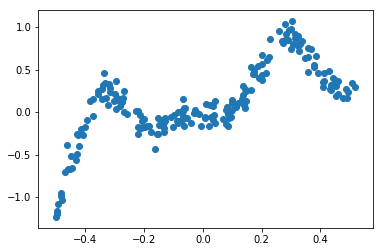

In [4]:
plt.scatter(x, y)

In [8]:
def predict_example(example, tree):
    if isinstance(tree, Leaf):
        return tree.output
    
    if tree.question.match(example):
        return predict_example(example, tree.true_branch)
    else:
        return predict_example(example, tree.false_branch)

In [6]:
df = pd.DataFrame(data=x, columns=['x'])
df['y'] = pd.DataFrame(data=y)
df.head()

,x,y
0,-0.494354,-1.078061
1,-0.496203,-1.163371
2,-0.445640,-0.662283
3,-0.497352,-1.195524
4,-0.458523,-0.665935


In [7]:
tree = regression_tree_algorithm(df, min_samples=10, max_depth=5)
print_tree(tree)

    Is x <= 0.15580043130800547?
    --> True:
       Is x <= -0.4258112284607219?
       --> True:
          Is x <= -0.4748116327639847?
          --> True:
             =====Predict -1.0929978561823532
          --> False:
             =====Predict -0.5476377811263604
       --> False:
          Is x <= -0.2618575308345673?
          --> True:
             Is x <= -0.38914096218709904?
             --> True:
                =====Predict -0.23545153155646265
             --> False:
                Is x <= -0.29286648920746394?
                --> True:
                   =====Predict 0.2154864784953742
                --> False:
                   =====Predict 0.13593953816425777
          --> False:
             Is x <= 0.09727149782082262?
             --> True:
                Is x <= -0.0844865582346167?
                --> True:
                   =====Predict -0.13946650276998804
                --> False:
                   =====Predict -0.028869388512333775
             --> F

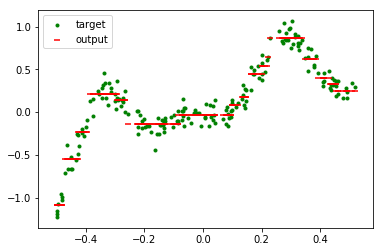

In [21]:
outputs = df.apply(predict_example, axis = 1, args=(tree,)).values
targets = df.y.values

# ax = fig.add_subplot(1, 1, 1)
plt.scatter(x, targets, label='target', marker='.', c='g')
plt.scatter(x, outputs, label='output', marker='_', c='r')
plt.legend()

plt.show()

## using this to calculate break point

In [24]:
import mylibrary.nnlib as tnn
colors = ['plum', 'darkviolet', 'purple', 'indigo']

In [27]:
x_data = x.reshape(-1,1)
y_data = y.reshape(-1,1)

In [45]:
optimizer = tnn.Adam()
linear1 = tnn.LinearLayer(1, 1, optimizer=optimizer)

_______________________
epoch 0
Loss 0.1671343378063235
Weight 1 
 [[-0.56065932]]
Biases 1 
 [0.01]


_______________________
epoch 10
Loss 0.1460575733586888
Weight 1 
 [[-0.46093295]]
Biases 1 
 [0.10330717]


_______________________
epoch 20
Loss 0.13337755970340026
Weight 1 
 [[-0.3624547]]
Biases 1 
 [0.15426179]


_______________________
epoch 30
Loss 0.12194969300025259
Weight 1 
 [[-0.26615921]]
Biases 1 
 [0.1460985]


_______________________
epoch 40
Loss 0.11149443571677972
Weight 1 
 [[-0.17273274]]
Biases 1 
 [0.12323816]


_______________________
epoch 50
Loss 0.10232771579944547
Weight 1 
 [[-0.08262216]]
Biases 1 
 [0.12102639]


_______________________
epoch 60
Loss 0.09411946907652385
Weight 1 
 [[0.00389954]]
Biases 1 
 [0.12985312]


_______________________
epoch 70
Loss 0.08689965695921957
Weight 1 
 [[0.08666575]]
Biases 1 
 [0.13104206]


_______________________
epoch 80
Loss 0.08055345008880782
Weight 1 
 [[0.16557079]]
Biases 1 
 [0.12762737]


_______________

TclError: this isn't a Tk application

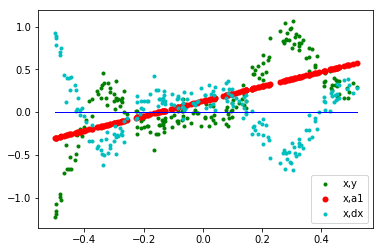

In [46]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.ion()
fig.show()
fig.canvas.draw()

for step in range(10000):
    a1 = linear1.forward(x_data)
    loss = tnn.MseLoss.loss(a1, y_data)
    dy = tnn.MseLoss.del_loss(a1, y_data)
    
    dx = linear1.backward(dy)
    
    linear1.update()
    
    if step % 10 == 0:

        print('_______________________')
        print("epoch", step)
        print("Loss", loss)

        ax.clear()
        plt.scatter(x, y, marker='.', c='g', label='x,y')
        plt.scatter(x, a1.reshape(-1), marker='.', c='r', lw=3, label='x,a1')
        plt.scatter(x, dy.reshape(-1), marker='.', c='c', lw=1, label='x,dx')
        plt.plot(x, np.zeros_like(x), c='b', lw=1)
        plt.legend()
        
        fig.canvas.draw()
        
        print("Weight 1", '\n', linear1.weights)
        print("Biases 1", '\n', linear1.bias)
        
        plt.pause(0.01)
        print("\n")
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

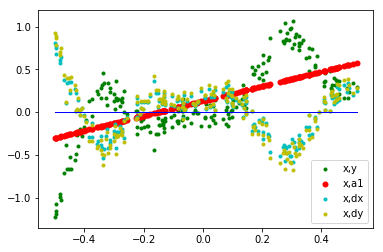

In [47]:
%matplotlib inline

plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, a1.reshape(-1), marker='.', c='r', lw=3, label='x,a1')
plt.scatter(x, dx.reshape(-1), marker='.', c='c', lw=1, label='x,dx')
plt.plot(x, np.zeros_like(x), c='b', lw=1)
plt.scatter(x, dy.reshape(-1), marker='.', c='y', lw=1, label='x,dy')
plt.legend()

In [48]:
dfres = pd.DataFrame(data=x, columns=['x'])
dfres['dy'] = pd.DataFrame(data=dy.reshape(-1))
dfres.head()

,x,dy
0,-0.494354,0.779468
1,-0.496203,0.863180
2,-0.445640,0.405780
3,-0.497352,0.894341
4,-0.458523,0.398301


In [53]:
tree = regression_tree_algorithm(dfres, min_samples=20, max_depth=1)
print_tree(tree)

    Is x <= -0.4748116327639847?
    --> True:
       =====Predict 0.7980845081825132
    --> False:
       =====Predict -0.028946140388905972


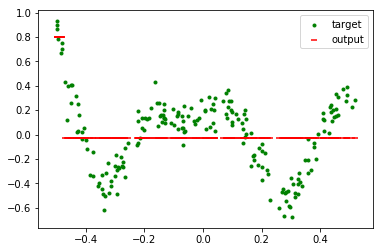

In [54]:
outputs = dfres.apply(predict_example, axis = 1, args=(tree,)).values
targets = dfres.dy.values

# ax = fig.add_subplot(1, 1, 1)
plt.scatter(x, targets, label='target', marker='.', c='g')
plt.scatter(x, outputs, label='output', marker='_', c='r')
plt.legend()

plt.show()